In [5]:
import os
import path_file
os.chdir(os.path.dirname(os.path.dirname(path_file.__file__)))
os.getcwd()

In [7]:
import cantera as ct
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.legend_handler import HandlerTuple

import phases
import energy as en
import fuel as fu
import gasifier as gs
import feedstock as fs

In [8]:
ultimate = [45.2, 5.4, 39.0, 0.1, 0, 0]
ash_WB = 0.9/100
moist_WB = 9.4/100
LHV_WB = 16.4 # MJ/kg

ash = ash_WB / (1 - moist_WB)
moist = moist_WB / (1 - moist_WB)
LHV = LHV_WB / (1 - moist_WB)

fuel = fs.create_fuel_stream(1, ultimate, ash, moist, LHV=LHV)
fuel.set_HHV_from_LHV(LHV)

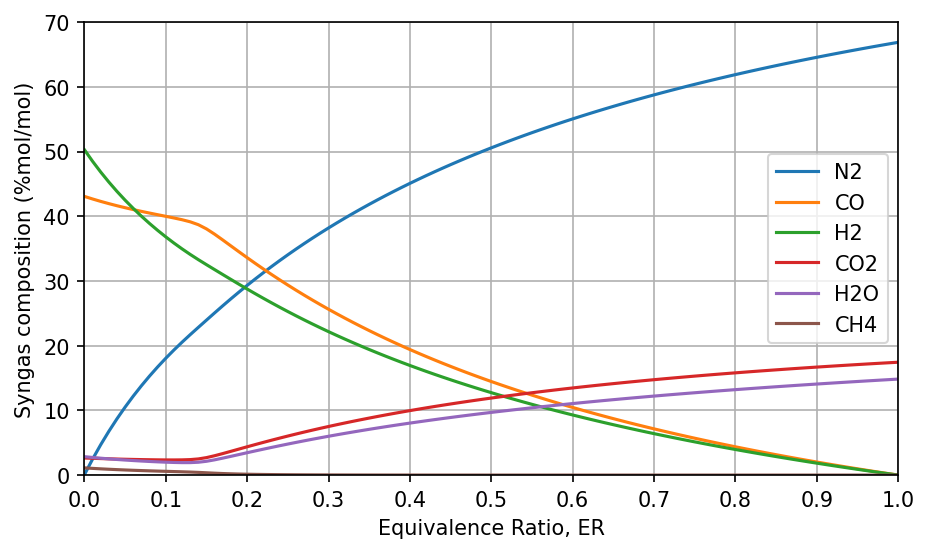

In [9]:
T = 800 + 273.15 # K
P = 1E5 # Pa
ERs = np.arange(0.0, 1.0+1E-6, 0.01)
OUT1 = []

for j, er in enumerate(ERs):
    air = fs.create_air_from_ER(fuel, er)
    outlet1 = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    OUT1.append(outlet1)

species = ['N2', 'CO', 'H2', 'CO2', 'H2O', 'CH4']
y1 = np.zeros((len(species), len(OUT1)))

for i, sp in enumerate(species):
    composition = [out.get_syngas_fraction(sp, water=True, nitrogen=True) for out in OUT1]
    y1[i] = composition

fig0 = plt.figure(figsize=(7,4), dpi=150)
for i, sp in enumerate(species):
    plt.plot(ERs, 100*y1[i], label=sp)
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-6, 0.1))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.show()

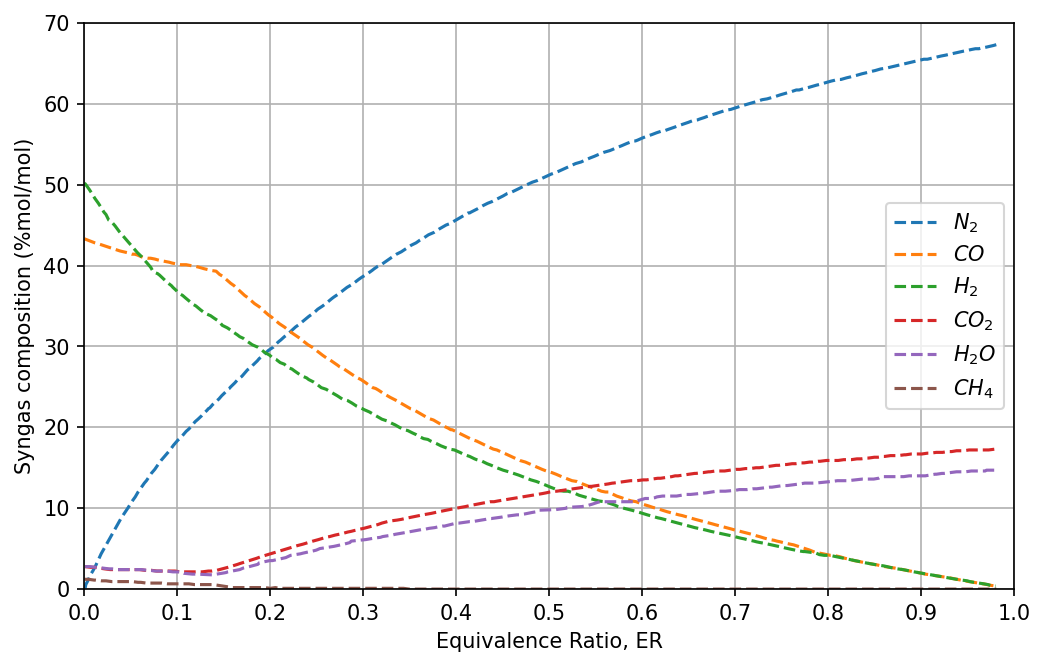

nan


In [10]:
baratieri_graph1 = pd.read_excel('data/baratieri_graph.xlsx', sheet_name='air')
fig1 = plt.figure(figsize=(8,5), dpi=150)
plt.plot(baratieri_graph1['ER1'], baratieri_graph1['N2'], label='$N_2$', linestyle='--')
plt.plot(baratieri_graph1['ER2'], baratieri_graph1['CO'], label='$CO$', linestyle='--')
plt.plot(baratieri_graph1['ER3'], baratieri_graph1['H2'], label='$H_2$', linestyle='--')
plt.plot(baratieri_graph1['ER4'], baratieri_graph1['CO2'], label='$CO_2$', linestyle='--')
plt.plot(baratieri_graph1['ER5'], baratieri_graph1['H2O'], label='$H_2O$', linestyle='--')
plt.plot(baratieri_graph1['ER6'], baratieri_graph1['CH4'], label='$CH_4$', linestyle='--')
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xticks(np.arange(0, 1+1E-9, 0.1))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.savefig('figures/baratieri0.png')
plt.show()

print(baratieri_graph1['H2O'][226])

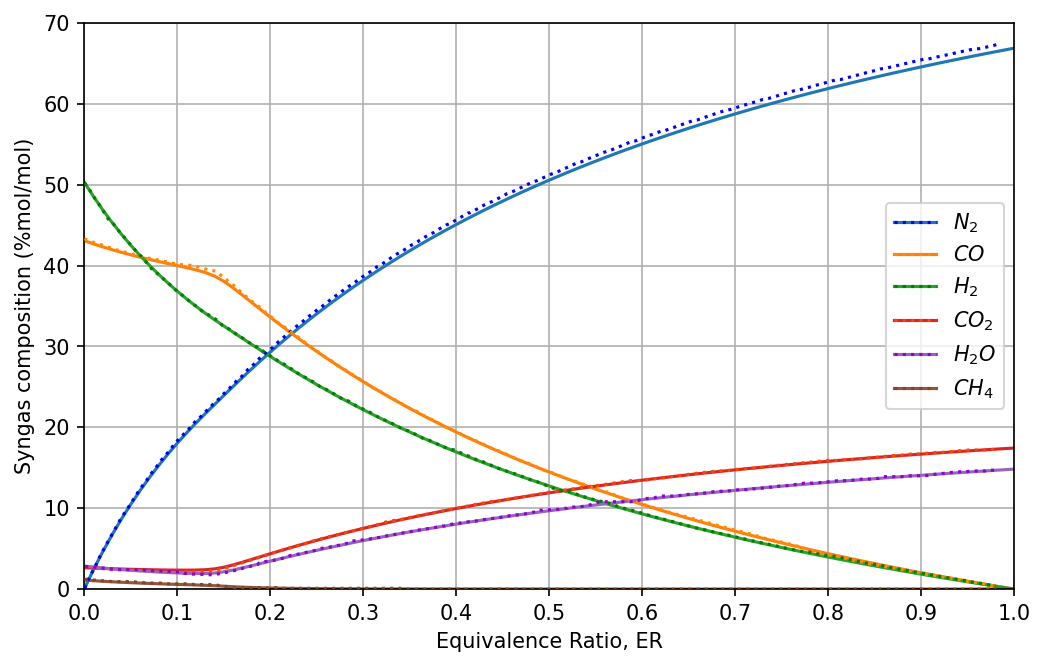

In [11]:
colors1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
colors2 = ['blue', 'darkorange', 'green', 'orangered', 'darkviolet', 'saddlebrown']
fig2, ax1 = plt.subplots(figsize=(8,5), dpi=150)
m1, = ax1.plot(ERs, [100*out.get_syngas_fraction('N2', water=True, nitrogen=True) for out in OUT1], zorder=2, color=colors1[0])
m2, = ax1.plot(ERs, [100*out.get_syngas_fraction('CO', water=True, nitrogen=True) for out in OUT1], zorder=2, color=colors1[1])
m3, = ax1.plot(ERs, [100*out.get_syngas_fraction('H2', water=True, nitrogen=True) for out in OUT1], zorder=2, color=colors1[2])
m4, = ax1.plot(ERs, [100*out.get_syngas_fraction('CO2', water=True, nitrogen=True) for out in OUT1], zorder=2, color=colors1[3])
m5, = ax1.plot(ERs, [100*out.get_syngas_fraction('H2O', water=True, nitrogen=True) for out in OUT1], zorder=2, color=colors1[4])
m6, = ax1.plot(ERs, [100*out.get_syngas_fraction('CH4', water=True, nitrogen=True) for out in OUT1], zorder=2, color=colors1[5])
n1, = ax1.plot(baratieri_graph1['ER1'], baratieri_graph1['N2'], linestyle=':',zorder=3, color=colors2[0])
n2, = ax1.plot(baratieri_graph1['ER2'], baratieri_graph1['CO'], linestyle=':', zorder=3, color=colors2[1])
n3, = ax1.plot(baratieri_graph1['ER3'], baratieri_graph1['H2'], linestyle=':', zorder=3, color=colors2[2])
n4, = ax1.plot(baratieri_graph1['ER4'], baratieri_graph1['CO2'], linestyle=':', zorder=3, color=colors2[3])
n5, = ax1.plot(baratieri_graph1['ER5'], baratieri_graph1['H2O'], linestyle=':', zorder=3, color=colors2[4])
n6, = ax1.plot(baratieri_graph1['ER6'], baratieri_graph1['CH4'], linestyle=':', zorder=3, color=colors2[5])
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xticks(np.arange(ERs[0], ERs[-1]+1E-9, 0.1))
l = ax1.legend([(m1, n1),(m2, n2),(m3,n3),(m4,n4),(m5,n5),(m6,n6)], ['$N_2$', '$CO$', '$H_2$', '$CO_2$', '$H_2O$', '$CH_4$'])
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
ax1.grid()
plt.savefig('figures/baratieri1.png')
plt.show()

In [12]:
T = 800 + 273.15 # K
P = 1E5 # Pa

ER_N2 = np.array(baratieri_graph1[~baratieri_graph1['ER1'].isnull()]['ER1'])
ER_CO = np.array(baratieri_graph1[~baratieri_graph1['ER2'].isnull()]['ER2'])
ER_H2 = np.array(baratieri_graph1[~baratieri_graph1['ER3'].isnull()]['ER3'])
ER_CO2 = np.array(baratieri_graph1[~baratieri_graph1['ER4'].isnull()]['ER4'])
ER_H2O = np.array(baratieri_graph1[~baratieri_graph1['ER5'].isnull()]['ER5'])
ER_CH4 = np.array(baratieri_graph1[~baratieri_graph1['ER6'].isnull()]['ER6'])

N2 = np.zeros_like(ER_N2)
CO = np.zeros_like(ER_CO)
H2 = np.zeros_like(ER_H2)
CO2 = np.zeros_like(ER_CO2)
H2O = np.zeros_like(ER_H2O)
CH4 = np.zeros_like(ER_CH4)

for i, er in enumerate(ER_N2):
    air = fs.create_air_from_ER(fuel, er)
    outlet = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    N2[i] = outlet.get_syngas_fraction('N2', water=True, nitrogen=True)

for i, er in enumerate(ER_CO):
    air = fs.create_air_from_ER(fuel, er)
    outlet = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    CO[i] = outlet.get_syngas_fraction('CO', water=True, nitrogen=True)

for i, er in enumerate(ER_H2):
    air = fs.create_air_from_ER(fuel, er)
    outlet = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    H2[i] = outlet.get_syngas_fraction('H2', water=True, nitrogen=True)

for i, er in enumerate(ER_CO2):
    air = fs.create_air_from_ER(fuel, er)
    outlet = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    CO2[i] = outlet.get_syngas_fraction('CO2', water=True, nitrogen=True)

for i, er in enumerate(ER_H2O):
    air = fs.create_air_from_ER(fuel, er)
    outlet = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    H2O[i] = outlet.get_syngas_fraction('H2O', water=True, nitrogen=True)

for i, er in enumerate(ER_CH4):
    air = fs.create_air_from_ER(fuel, er)
    outlet = gs.gasify_isot(fuel, air, T, P, charFormation=0, directMethaneConv=0)
    CH4[i] = outlet.get_syngas_fraction('CH4', water=True, nitrogen=True)

In [13]:
frac_N2 = np.array(baratieri_graph1[~baratieri_graph1['ER1'].isnull()]['N2'])/100
frac_CO = np.array(baratieri_graph1[~baratieri_graph1['ER2'].isnull()]['CO'])/100
frac_H2 = np.array(baratieri_graph1[~baratieri_graph1['ER3'].isnull()]['H2'])/100
frac_CO2 = np.array(baratieri_graph1[~baratieri_graph1['ER4'].isnull()]['CO2'])/100
frac_H2O = np.array(baratieri_graph1[~baratieri_graph1['ER5'].isnull()]['H2O'])/100
frac_CH4 = np.array(baratieri_graph1[~baratieri_graph1['ER6'].isnull()]['CH4'])/100

err_N2 = abs(frac_N2 - N2)*100
err_CO = abs(frac_CO - CO)*100
err_H2 = abs(frac_H2 - H2)*100
err_CO2 = abs(frac_CO2 - CO2)*100
err_H2O = abs(frac_H2O - H2O)*100
err_CH4 = abs(frac_CH4 - CH4)*100

print(ER_N2[err_N2.argmax()], np.mean(err_N2))
print(max(err_CO), np.mean(err_CO))
print(max(err_H2), np.mean(err_H2))
print(max(err_CO2), np.mean(err_CO2))
print(max(err_H2O), np.mean(err_H2O))
print(max(err_CH4), np.mean(err_CH4))

print((np.mean(err_N2) + np.mean(err_CO) + np.mean(err_H2) + np.mean(err_CO2) + np.mean(err_H2O) + np.mean(err_CH4))/6)

0.9026 0.5457278743400237
0.6987556453964205 0.10881434432340165
0.3326842683238129 0.07375298365522437
0.24340805033916876 0.059323975370503816
0.3424598310451804 0.0733895952903538
0.14522639130389106 0.029263660544361757
0.14837873892064488


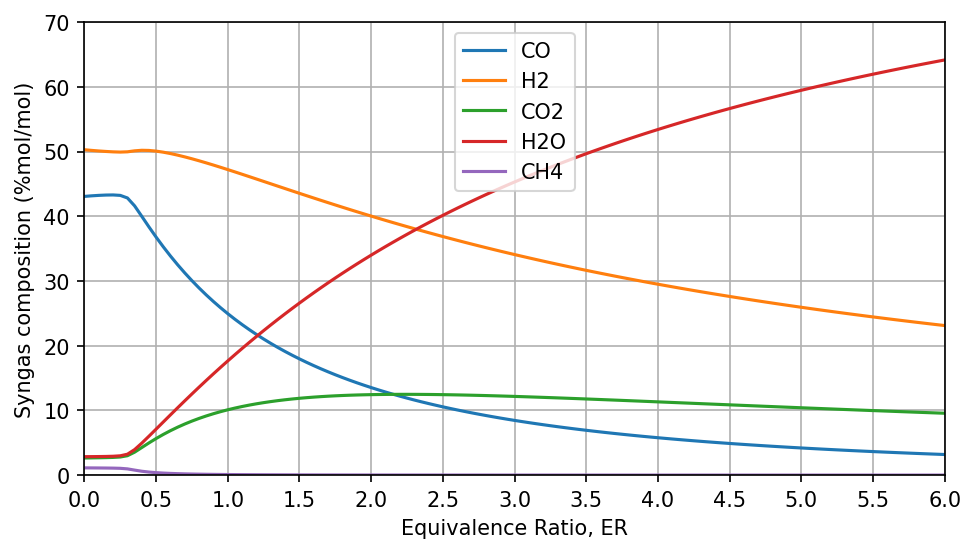

In [14]:
T = 800 + 273.15 # K
P = 1E5 # Pa
SRs = np.arange(0.0, 6.0+1E-6, 0.05)
OUT2 = []

for j, sr in enumerate(SRs):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet2 = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    OUT2.append(outlet2)

species = ['CO', 'H2', 'CO2', 'H2O', 'CH4']
y2 = np.zeros((len(species), len(OUT2)))

for i, sp in enumerate(species):
    composition = [out.get_syngas_fraction(sp, water=True, nitrogen=True) for out in OUT2]
    y2[i] = composition

fig3 = plt.figure(figsize=(7.4,4), dpi=150)
for i, sp in enumerate(species):
    plt.plot(SRs, 100*y2[i], label=sp)
plt.xlim(0, 1)
plt.ylim(0, 70)
plt.xticks(np.arange(SRs[0], SRs[-1]+1E-6, 0.5))
plt.legend()
plt.xlabel('Equivalence Ratio, ER')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.show()

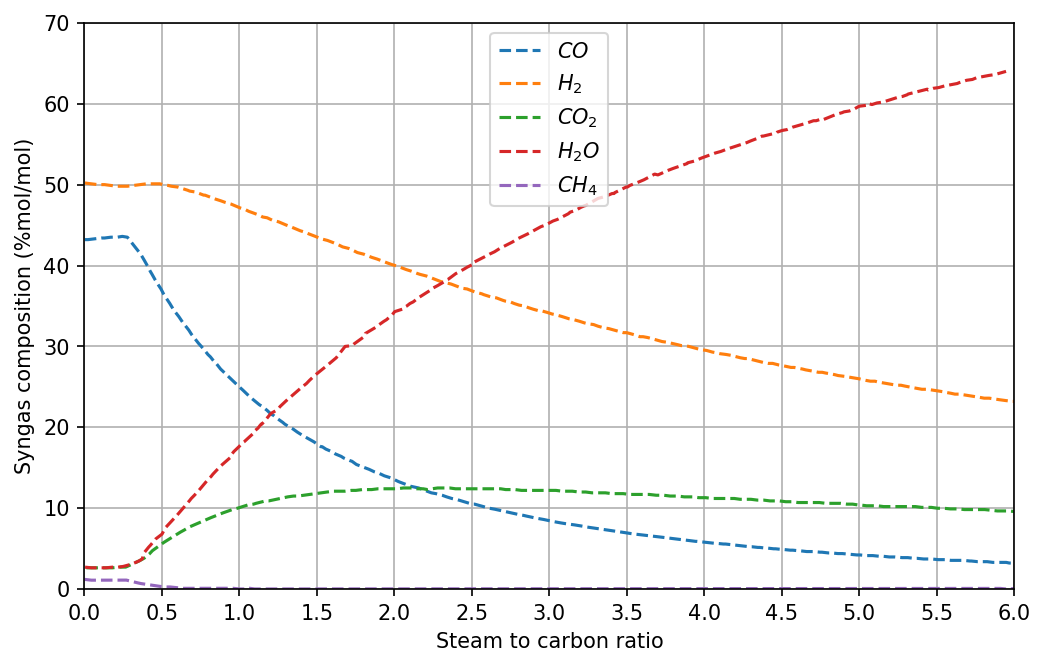

In [15]:
baratieri_graph2 = pd.read_excel('data/baratieri_graph.xlsx', sheet_name='steam')
fig4 = plt.figure(figsize=(8,5), dpi=150)
plt.plot(baratieri_graph2['ER2'], baratieri_graph2['CO'], label='$CO$', linestyle='--')
plt.plot(baratieri_graph2['ER1'], baratieri_graph2['H2'], label='$H_2$', linestyle='--')
plt.plot(baratieri_graph2['ER3'], baratieri_graph2['CO2'], label='$CO_2$', linestyle='--')
plt.plot(baratieri_graph2['ER5'], baratieri_graph2['H2O'], label='$H_2O$', linestyle='--')
plt.plot(baratieri_graph2['ER4'], baratieri_graph2['CH4'], label='$CH_4$', linestyle='--')
plt.xlim(0, 6)
plt.ylim(0, 70)
plt.xticks(np.arange(0, 6+1E-9, 0.5))
plt.legend()
plt.xlabel('Steam to carbon ratio')
plt.ylabel('Syngas composition (%mol/mol)')
plt.grid()
plt.savefig('figures/baratieri2.png')
plt.show()

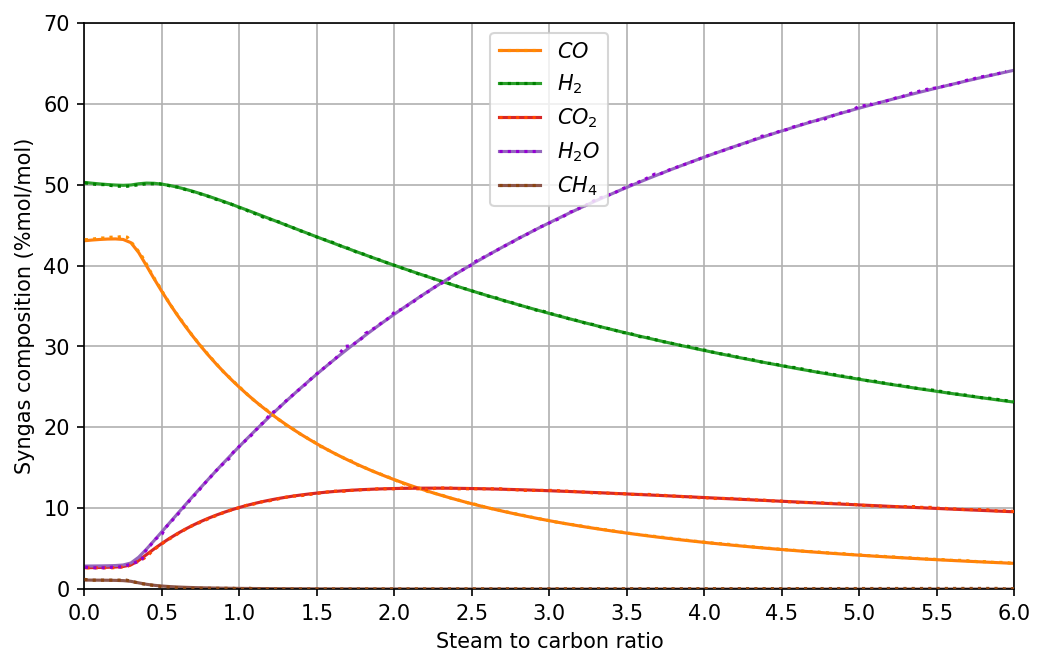

In [16]:
colors1 = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown']
colors2 = ['blue', 'darkorange', 'green', 'orangered', 'darkviolet', 'saddlebrown']
fig5, ax1 = plt.subplots(figsize=(8,5), dpi=150)
m2, = ax1.plot(SRs, [100*out.get_syngas_fraction('CO', water=True, nitrogen=True) for out in OUT2], zorder=2, color=colors1[1])
m3, = ax1.plot(SRs, [100*out.get_syngas_fraction('H2', water=True, nitrogen=True) for out in OUT2], zorder=2, color=colors1[2])
m4, = ax1.plot(SRs, [100*out.get_syngas_fraction('CO2', water=True, nitrogen=True) for out in OUT2], zorder=2, color=colors1[3])
m5, = ax1.plot(SRs, [100*out.get_syngas_fraction('H2O', water=True, nitrogen=True) for out in OUT2], zorder=2, color=colors1[4])
m6, = ax1.plot(SRs, [100*out.get_syngas_fraction('CH4', water=True, nitrogen=True) for out in OUT2], zorder=2, color=colors1[5])
n2, = ax1.plot(baratieri_graph2['ER2'], baratieri_graph2['CO'], linestyle=':', zorder=3, color=colors2[1])
n3, = ax1.plot(baratieri_graph2['ER1'], baratieri_graph2['H2'], linestyle=':', zorder=3, color=colors2[2])
n4, = ax1.plot(baratieri_graph2['ER3'], baratieri_graph2['CO2'], linestyle=':', zorder=3, color=colors2[3])
n5, = ax1.plot(baratieri_graph2['ER5'], baratieri_graph2['H2O'], linestyle=':', zorder=3, color=colors2[4])
n6, = ax1.plot(baratieri_graph2['ER4'], baratieri_graph2['CH4'], linestyle=':', zorder=3, color=colors2[5])
plt.xlim(0, 6)
plt.ylim(0, 70)
plt.xticks(np.arange(SRs[0], SRs[-1]+1E-9, 0.5))
l = ax1.legend([(m2, n2),(m3,n3),(m4,n4),(m5,n5),(m6,n6)], ['$CO$', '$H_2$', '$CO_2$', '$H_2O$', '$CH_4$'])
plt.xlabel('Steam to carbon ratio')
plt.ylabel('Syngas composition (%mol/mol)')
ax1.grid()
plt.savefig('figures/baratieri3.png')
plt.show()

In [17]:
T = 800 + 273.15 # K
P = 1E5 # Pa

SR_CO = np.array(baratieri_graph2[~baratieri_graph2['ER2'].isnull()]['ER2'])
SR_H2 = np.array(baratieri_graph2[~baratieri_graph2['ER1'].isnull()]['ER1'])
SR_CO2 = np.array(baratieri_graph2[~baratieri_graph2['ER3'].isnull()]['ER3'])
SR_H2O = np.array(baratieri_graph2[~baratieri_graph2['ER5'].isnull()]['ER5'])
SR_CH4 = np.array(baratieri_graph2[~baratieri_graph2['ER4'].isnull()]['ER4'])

CO = np.zeros_like(SR_CO)
H2 = np.zeros_like(SR_H2)
CO2 = np.zeros_like(SR_CO2)
H2O = np.zeros_like(SR_H2O)
CH4 = np.zeros_like(SR_CH4)


for i, sr in enumerate(SR_CO):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    CO[i] = outlet.get_syngas_fraction('CO', water=True, nitrogen=True)

for i, sr in enumerate(SR_H2):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    H2[i] = outlet.get_syngas_fraction('H2', water=True, nitrogen=True)

for i, sr in enumerate(SR_CO2):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    CO2[i] = outlet.get_syngas_fraction('CO2', water=True, nitrogen=True)

for i, sr in enumerate(SR_H2O):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    H2O[i] = outlet.get_syngas_fraction('H2O', water=True, nitrogen=True)

for i, sr in enumerate(SR_CH4):
    steam = fs.create_steam_from_SCR(fuel, sr)
    outlet = gs.gasify_isot(fuel, steam, T, P, charFormation=0, directMethaneConv=0)
    CH4[i] = outlet.get_syngas_fraction('CH4', water=True, nitrogen=True)

KeyboardInterrupt: 

In [ ]:
frac_CO = np.array(baratieri_graph2[~baratieri_graph2['ER2'].isnull()]['CO'])/100
frac_H2 = np.array(baratieri_graph2[~baratieri_graph2['ER1'].isnull()]['H2'])/100
frac_CO2 = np.array(baratieri_graph2[~baratieri_graph2['ER3'].isnull()]['CO2'])/100
frac_H2O = np.array(baratieri_graph2[~baratieri_graph2['ER5'].isnull()]['H2O'])/100
frac_CH4 = np.array(baratieri_graph2[~baratieri_graph2['ER4'].isnull()]['CH4'])/100

err_CO = abs(frac_CO - CO)*100
err_H2 = abs(frac_H2 - H2)*100
err_CO2 = abs(frac_CO2 - CO2)*100
err_H2O = abs(frac_H2O - H2O)*100
err_CH4 = abs(frac_CH4 - CH4)*100

print(max(err_CO), np.mean(err_CO))
print(max(err_H2), np.mean(err_H2))
print(max(err_CO2), np.mean(err_CO2))
print(max(err_H2O), np.mean(err_H2O))
print(max(err_CH4), np.mean(err_CH4))

print((np.mean(err_CO) + np.mean(err_H2) + np.mean(err_CO2) + np.mean(err_H2O) + np.mean(err_CH4))/6)

0.41762995543570547 0.0462109783967689
0.13951695469647252 0.0409102762143462
0.2237012342224745 0.03722445497167194
0.6529083244097046 0.07609550391527567
0.13613463071957196 0.048867406378333735
0.04155143664606607
